<a href="https://colab.research.google.com/github/ayuri1512/Data-Science-Projects/blob/main/price_optimization_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
!ls /content/drive/MyDrive/DS/Datasets/Competition_Data.csv

/content/drive/MyDrive/DS/Datasets/Competition_Data.csv


In [7]:
df = pd.read_csv("/content/drive/MyDrive/DS/Datasets/Competition_Data.csv")

In [8]:
df.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [9]:
df.dtypes

,0
Index,int64
Fiscal_Week_ID,object
Store_ID,object
Item_ID,object
Price,float64
Item_Quantity,int64
Sales_Amount_No_Discount,float64
Sales_Amount,float64
Competition_Price,float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


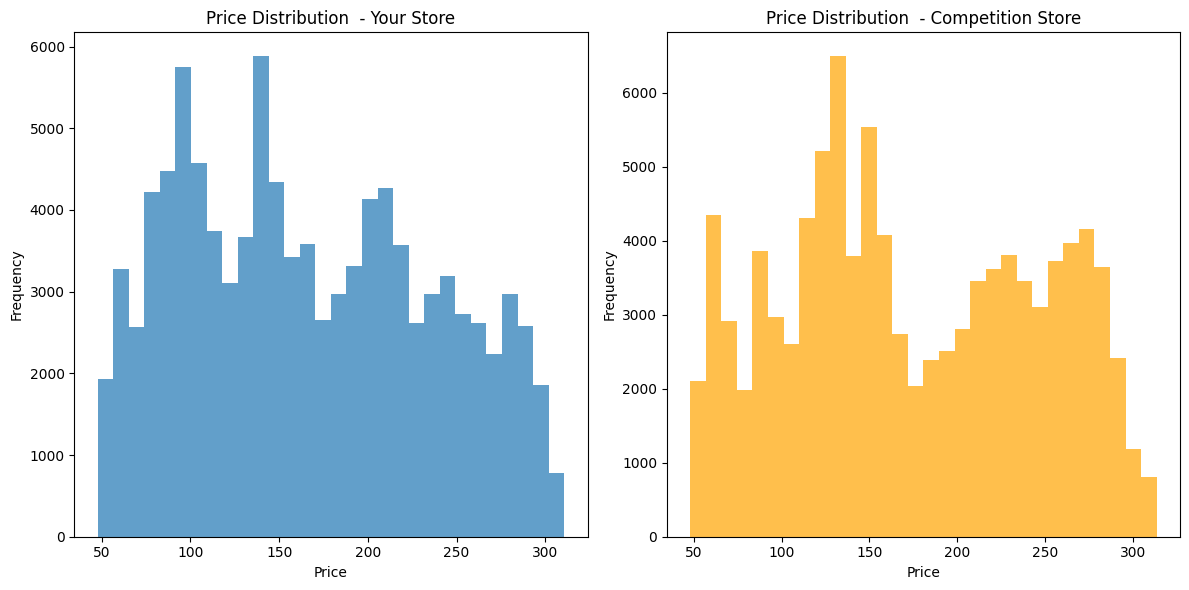

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins = 30, alpha = 0.7, label = 'Your Store')
plt.title('Price Distribution  - Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Competition_Price'], bins = 30, alpha = 0.7, color = 'orange', label = 'Competition Store')
plt.title('Price Distribution  - Competition Store')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

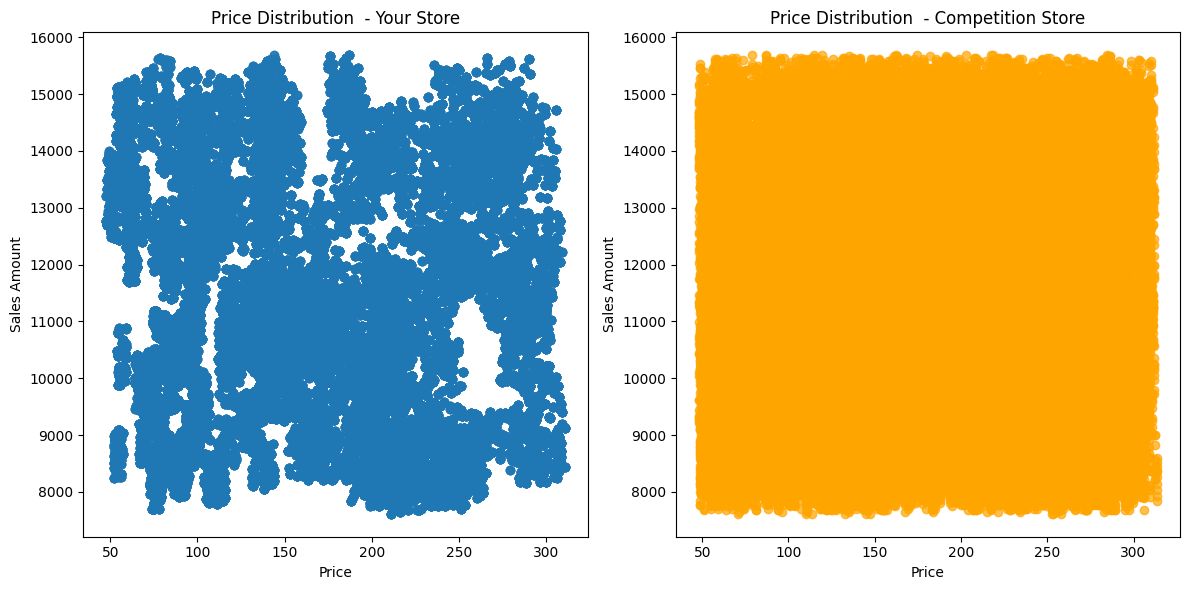

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Price'], df['Sales_Amount'], alpha = 0.7, label = 'Your Store')
plt.title('Price Distribution  - Your Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')

plt.subplot(1, 2, 2)
plt.scatter(df['Competition_Price'], df['Sales_Amount'], alpha = 0.7, color = 'orange', label = 'Competition Store')
plt.title('Price Distribution  - Competition Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.tight_layout()
plt.show()

In [24]:
df['Fiscal_Week_ID'] = pd.to_datetime(df['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

weekly_prices = df.groupby('Fiscal_Week_ID').agg({
    'Price' : 'mean',
    'Competition_Price' : 'mean'
}).reset_index()

plt.figure(figsize = (12, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label = 'Your Store', marker = 'o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label = 'Competition Store', marker = 'o')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title ('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

TypeError: unsupported operand type(s) for +: 'DatetimeArray' and 'str'